In [1]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
# Define tickers symbols
tickerSymbols = ['MSFT', 'TSLA', 'AAPL', 'AMZN', 'GOOG' ,]

# Get the data on these tickers
MSFT = yf.Ticker(tickerSymbols[0])
TSLA = yf.Ticker(tickerSymbols[1])
AAPL = yf.Ticker(tickerSymbols[2])
AMZN = yf.Ticker(tickerSymbols[3])
GOOG = yf.Ticker(tickerSymbols[4])


In [4]:
# Get the historical prices for the tickers
MSFT_df = MSFT.history(period='1d', start='2015-1-1', end='2020-1-1')
TSLA_df = TSLA.history(period='1d', start='2015-1-1', end='2020-1-1')
AAPL_df = AAPL.history(period='1d', start='2015-1-1', end='2020-1-1')
AMZN_df = AMZN.history(period='1d', start='2015-1-1', end='2020-1-1')
GOOG_df = GOOG.history(period='1d', start='2015-1-1', end='2020-1-1')

In [5]:
# Visualize one example
GOOG_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,26.378078,26.490770,26.133251,26.168653,28951268,0.0,0.0
2015-01-05 00:00:00-05:00,26.091366,26.144720,25.582764,25.623152,41196796,0.0,0.0
2015-01-06 00:00:00-05:00,25.679497,25.738087,24.983908,25.029282,57998800,0.0,0.0
2015-01-07 00:00:00-05:00,25.280592,25.292759,24.914099,24.986401,41301082,0.0,0.0
2015-01-08 00:00:00-05:00,24.831326,25.105074,24.482782,25.065184,67071641,0.0,0.0


In [6]:
# Save the close columns of each stock into new variables
MSFT = MSFT_df['Close']
TSLA = TSLA_df['Close']
AAPL = AAPL_df['Close']
AMZN = AMZN_df['Close']
GOOG = GOOG_df['Close']

# Concatenate all stocks close columns into one data frame
stocks_df = pd.concat([MSFT, TSLA, AAPL, AMZN, GOOG], axis='columns', join='inner')

# Rename the data frame columns with their corresponding tickers symbols
stocks_df.columns = ['MSFT', 'TSLA', 'AAPL', 'AMZN', 'GOOG']

# Visualize the new data frame
stocks_df.head()

,MSFT,TSLA,AAPL,AMZN,GOOG
Date,,,,,
2015-01-02 00:00:00-05:00,40.620667,14.620667,24.531765,15.4260,26.168653
2015-01-05 00:00:00-05:00,40.247116,14.006000,23.840668,15.1095,25.623152
2015-01-06 00:00:00-05:00,39.656418,14.085333,23.842907,14.7645,25.029282
2015-01-07 00:00:00-05:00,40.160255,14.063333,24.177238,14.9210,24.986401
2015-01-08 00:00:00-05:00,41.341686,14.041333,25.106182,15.0230,25.065184


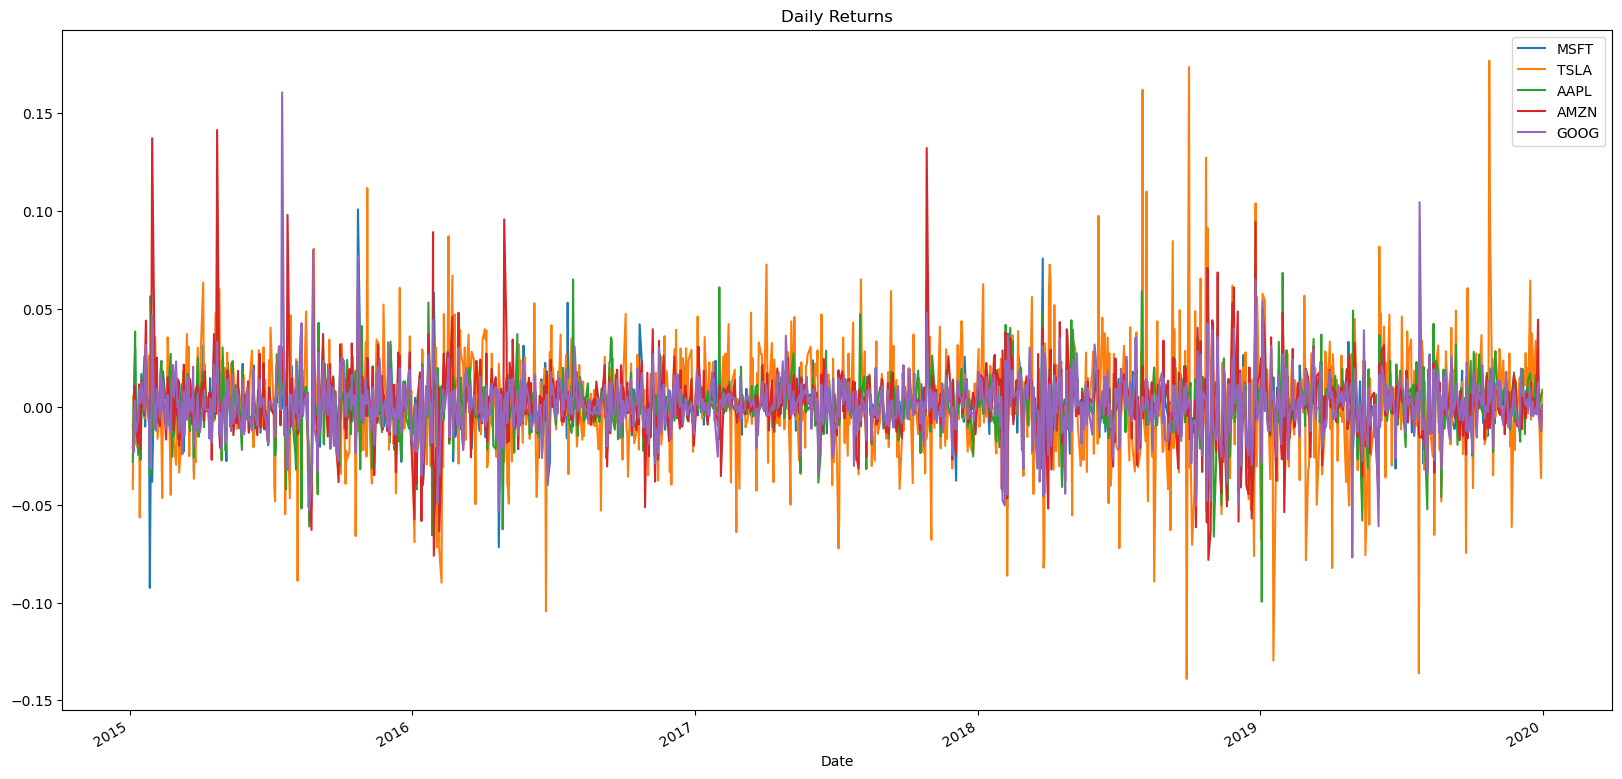

In [7]:
# Get daily percentage change
stocks_df = stocks_df.pct_change().dropna()

# Visualize new data frame
stocks_df.head()

# Plot daily percentage change
stocks_df.plot(figsize=(20, 10), title="Daily Returns");

In [8]:
#According to the plot above, it seems that TSLA is the most volatile stock out of the five analyzed stocks while MSFT seems to be the least volatile stock. To understand this interpretation, one should focus on the amount of peaks in the plot (either up or down): the higher the amount of peaks, the higher the volatility of a stock, and thus, more investment risk associated with it.

#calculate the cumulative returns and plot them to compare the stocks behaviors over the years been analyzed. In addition, let’s graph the box plot (also known as box and whiskers plot).

#calculate the cumulative returns and plot them to compare the stocks behaviors over the years been analyzed.

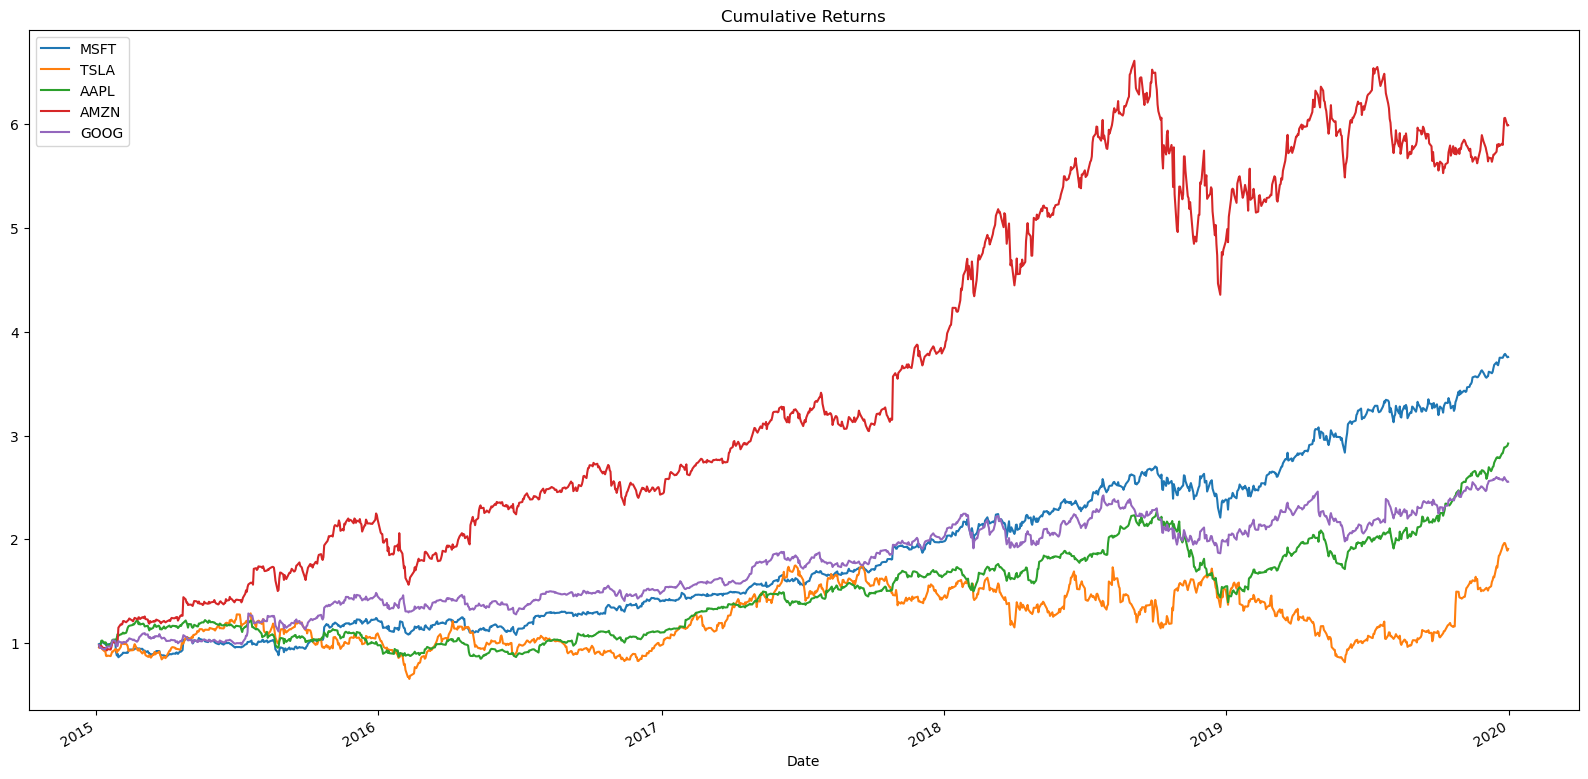

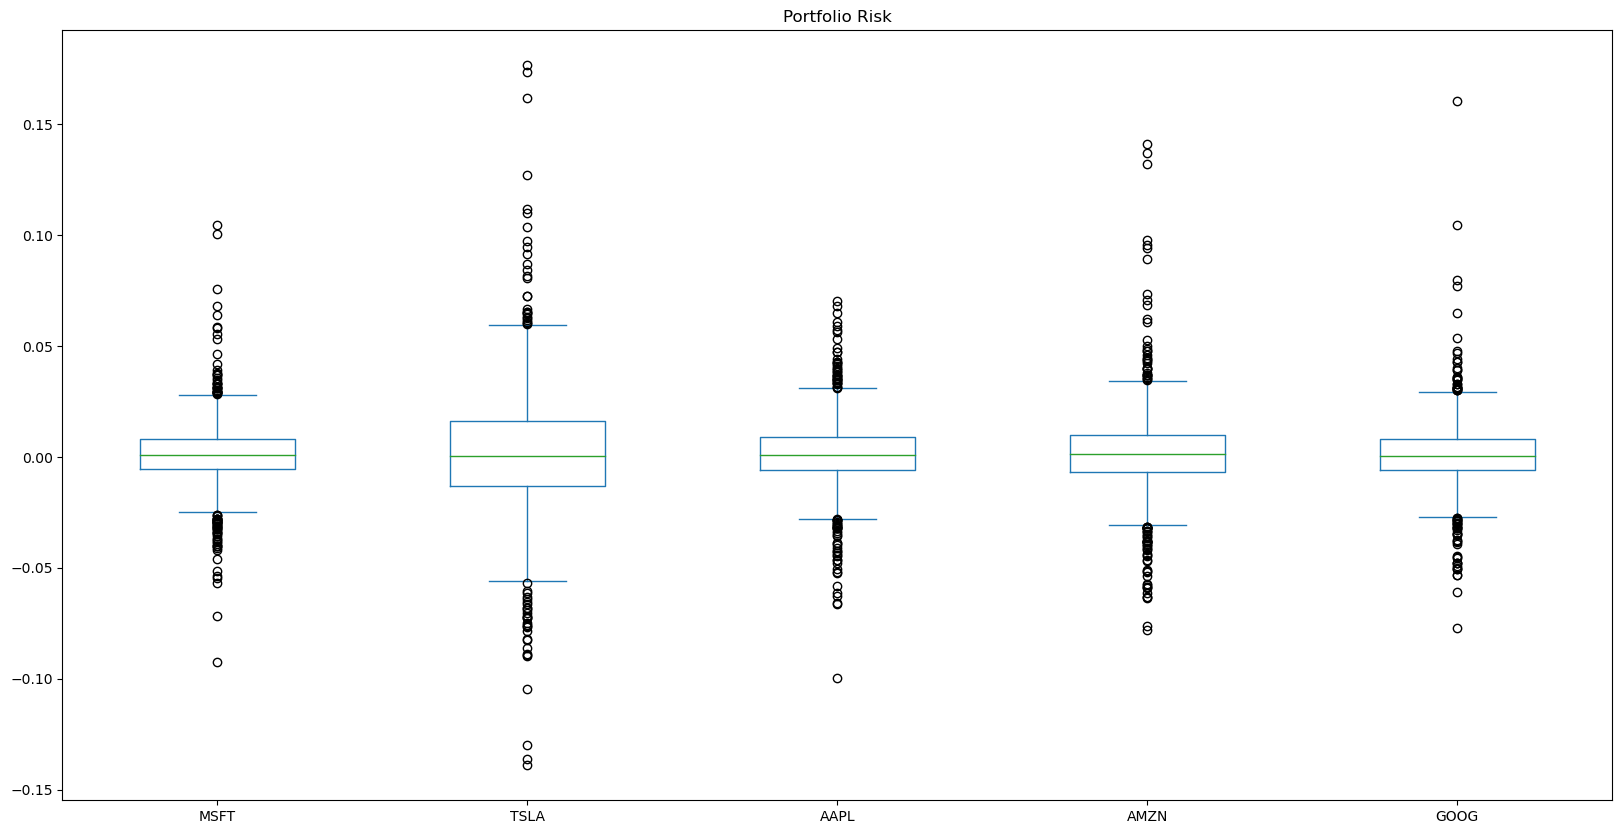

In [9]:
# Calculate cumulative returns
cumulative_returns = (1 + stocks_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns");

# Box plot to visually show risk
stocks_df.plot.box(figsize=(20, 10), title="Portfolio Risk");

In [ ]:
#According to the cumulative returns plot above, by the beginning of year 2020, AMZN stock had the highest cumulative returns by a significant difference, followed by MSFT, AAPL, GOOG and finally TSLA.

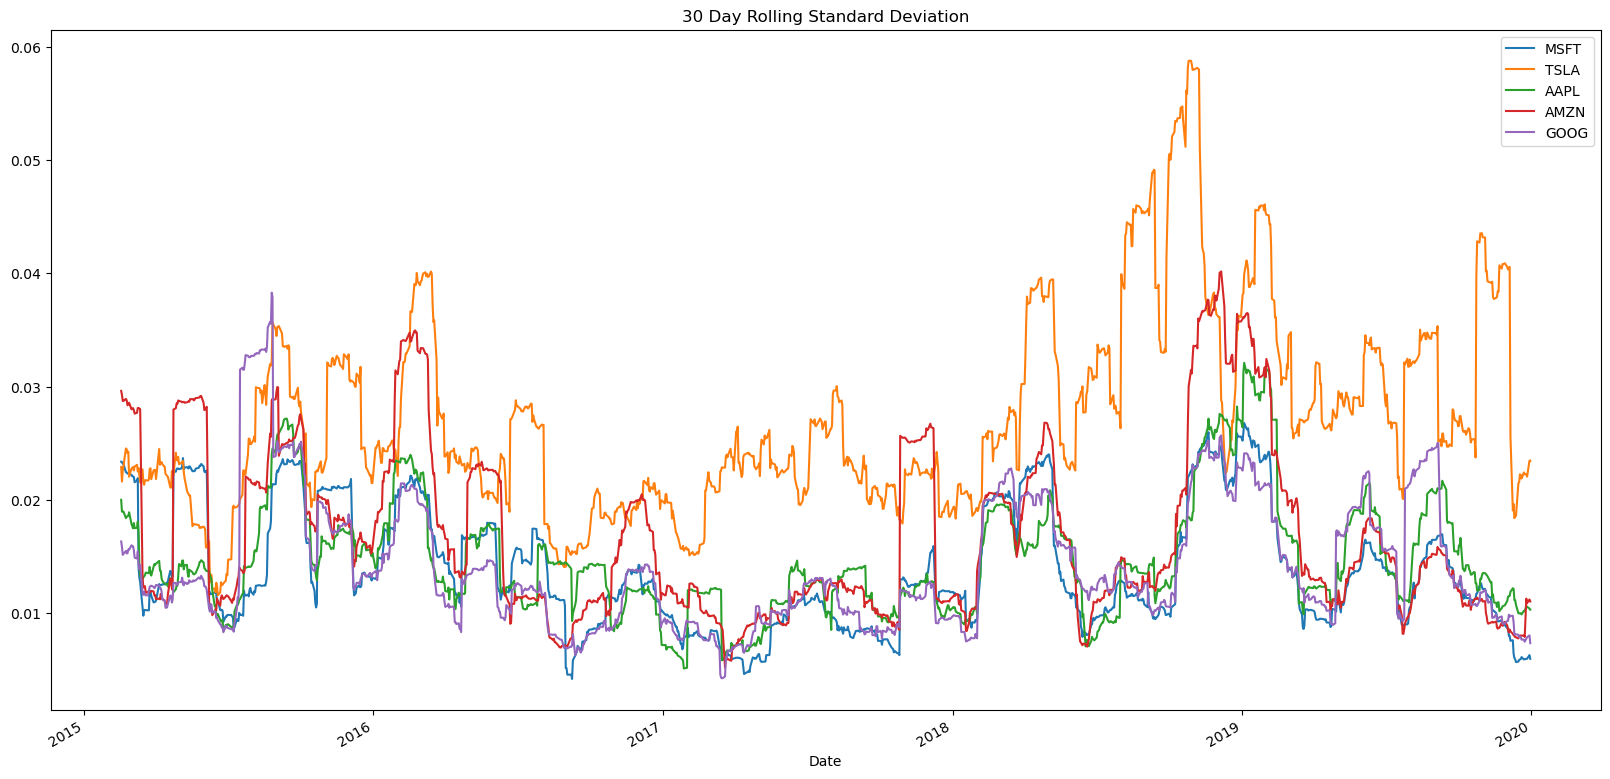

In [12]:
# Calculate standard deviation for each stock
stocks_df.std()

# Results:

# MSFT    0.014686
# TSLA    0.028312
# AAPL    0.015646
# AMZN    0.018426
# GOOG    0.015122
# dtype: float64

# Calculate annualized standard deviation (252 trading days)
stocks_df.std() * np.sqrt(252)

# Results:
# MSFT    0.233130
# TSLA    0.449436
# AAPL    0.248374
# AMZN    0.292501
# GOOG    0.240049
# dtype: float64

# Calculate and plot the rolling standard deviation for each stock using a 30 trading day window
stocks_df.rolling(window=30).std().plot(figsize=(20, 10), title="30 Day Rolling Standard Deviation");


In [ ]:
#Interesting. According to the plot above, years 2015, 2018 and 2019 were highly volatile for TSLA and AMZN stocks. In contrast, the year 2017 was the one with the lowest volatility for most of the stocks. The rolling standard deviations for MSFT, AAPL and GOOG stocks were to some degree very similar over the five years analyzed.

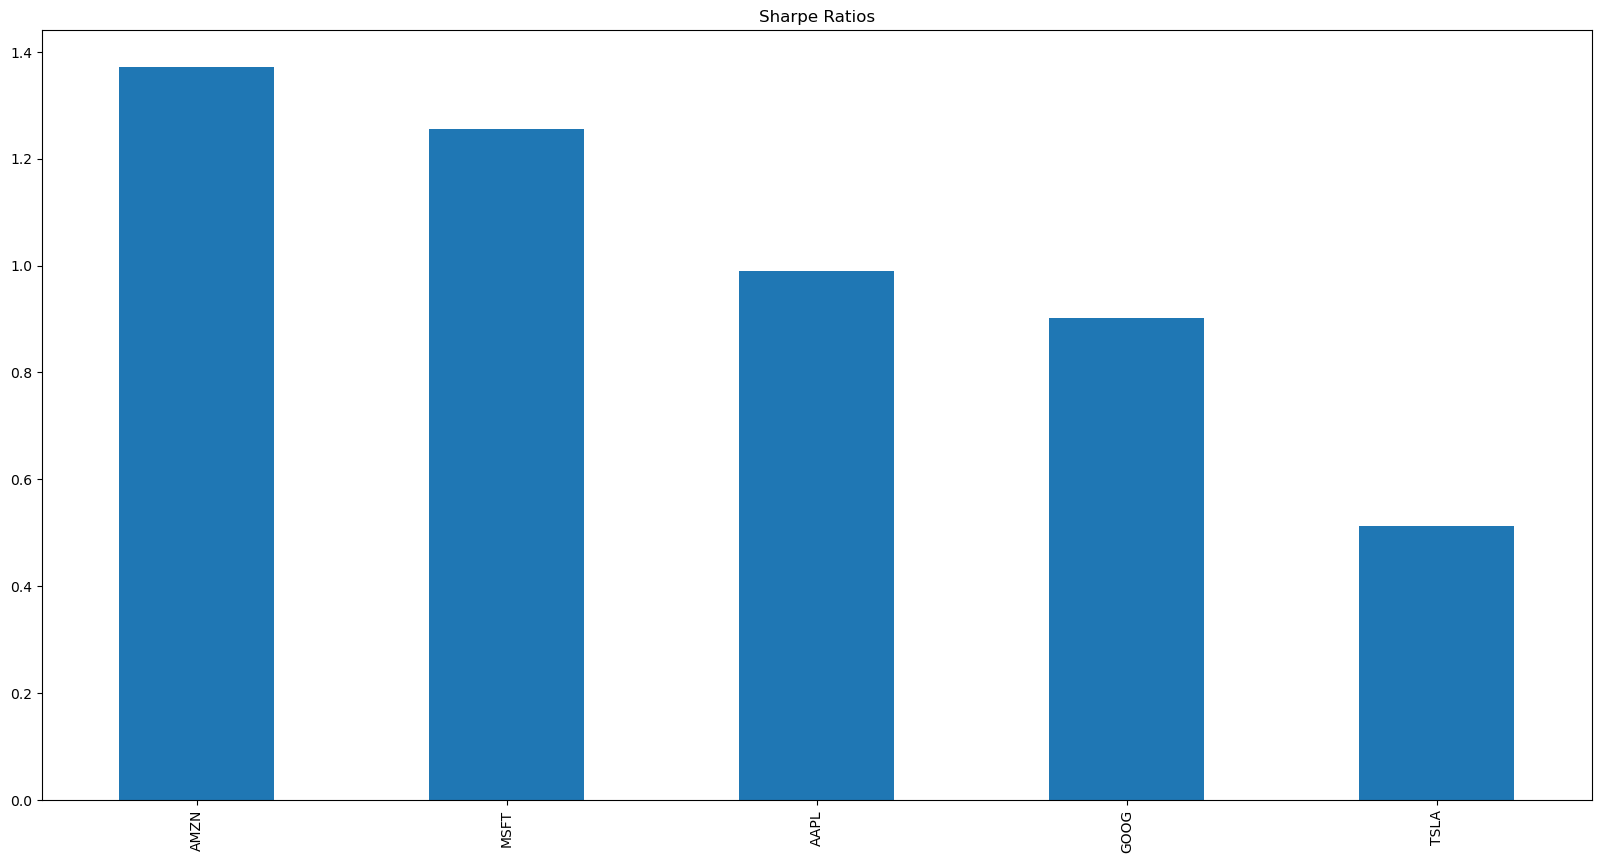

In [13]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (stocks_df.mean() * 252) / (stocks_df.std() * np.sqrt(252))
sharpe_ratios = sharpe_ratios.sort_values(ascending=False)
sharpe_ratios

# Results:

# AMZN    1.372067
# MSFT    1.254869
# AAPL    0.990570
# GOOG    0.902369
# TSLA    0.511901
# dtype: float64

# Visualize the Sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios");

In [ ]:
#According to the Sharpe ratios calculated for each of the analyzed stocks, AMZN got the best score with a Sharpe ratio of 1.37. Sharpe ratios greater than 1.0 (i.e. AMZN and MSFT) are considered optimal and those below 1.0 (i.e. AAPL, GOOG & TSLA) are considered sub-optimal.

#Making the Investment Decision
#For this example, if an investor had to make an investment decision based only on the stocks cumulative returns, he/she would select AMZN stock since it outperformed all the other stocks by a significant difference.

#On the other hand, if an investor had to make an investment decision based only on the stocks standard deviations, he/she would select MSFT stock in an effort to minimize volatility.

#Finally, if an investor had to make an investment decision based only on the stocks Sharpe ratios, he/she would select AMZN stock since it got the best score.